# Mini Project: Perform Multiple Linear Regression

## Overview
This project focuses on using multiple linear regression to analyze the relationship between sales and various marketing promotion strategies. By leveraging multiple independent variables, such as TV, social media, radio, and influencer promotions, we aim to build a predictive model that estimates sales based on these factors. This project will cover the complete data science pipeline, including data exploration, preprocessing, model building, evaluation, and interpretation.

## Objective
Develop a multiple linear regression model to predict sales based on marketing promotion data. The project will involve exploring the dataset, selecting relevant independent variables, fitting the model, checking assumptions, and interpreting the results to provide actionable insights.

## Learning Outcomes
1. Understand the concept of multiple linear regression and its applications.
2. Learn to preprocess and explore data for regression analysis.
3. Gain experience in fitting and evaluating a multiple linear regression model.
4. Check and validate regression assumptions.
5. Interpret model coefficients and communicate results to stakeholders.

---


## Step 1: Define the Problem
### Task:
Understand the problem and its real-world implications. The goal is to predict sales based on various marketing promotion strategies, which can help the business optimize its marketing efforts and allocate resources effectively.

### Mini-task:
Write a brief paragraph on how predicting sales using multiple linear regression can benefit the business.

---

Predicting sales using multiple linear regression can significantly benefit a business by providing a data-driven approach to forecasting. This statistical method analyzes the relationship between multiple independent variables—such as advertising spend, seasonality, or economic indicators—and sales as the dependent variable. By identifying which factors most strongly influence sales, businesses can optimize resource allocation, refine marketing strategies, and improve inventory management. Accurate predictions enable proactive decision-making, helping companies anticipate demand, reduce costs, and maximize profits, ultimately giving them a competitive edge in dynamic markets.

## Step 2: Data Collection
### Task:
Collect the dataset required for building the regression model. The dataset used in this project is `marketing_sales_data.csv`, which contains information about TV, social media, radio, and influencer promotions, along with sales data.

### Mini-task:
Load the dataset and inspect the first few rows to understand its structure.

#### Hint:
Use the `pandas` library to load the dataset and display the first five rows.

```python
import pandas as pd

# Load the dataset
data = pd.read_csv('marketing_sales_data.csv')

# Display the first five rows
### YOUR CODE HERE ###
```

---

In [7]:
import pandas as pd
import numpy as np

# Simulate the marketing_sales_data.csv dataset (replace this with actual file loading)
np.random.seed(42)  # For reproducibility
data = {
    'TV': np.random.uniform(10, 100, 100),           # TV promotion budget (e.g., in thousands)
    'Social_Media': np.random.uniform(5, 50, 100),   # Social media budget
    'Radio': np.random.uniform(5, 60, 100),          # Radio budget
    'Influencer': np.random.choice(['Nano', 'Micro', 'Macro', 'Mega'], 100),  # Categorical
    'Sales': 50 + 2.5 * np.random.uniform(10, 100, 100) + np.random.normal(0, 10, 100)  # Simulated sales
}
df = pd.DataFrame(data)

# Mini-task: Load dataset and inspect the first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Optional: Basic info about the dataset
print("\nDataset Info:")
print(df.info())

First 5 rows of the dataset:
          TV  Social_Media      Radio Influencer       Sales
0  43.708611      6.414313  40.311741       Nano  191.314734
1  95.564288     33.638469   9.627698       Mega  282.463776
2  75.879455     19.146019  13.889579       Mega  231.782663
3  63.879264     27.885681  54.420480      Micro  110.060861
4  24.041678     45.840491  38.353598      Macro   90.687806

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            100 non-null    float64
 1   Social_Media  100 non-null    float64
 2   Radio         100 non-null    float64
 3   Influencer    100 non-null    object 
 4   Sales         100 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.0+ KB
None


## Step 3: Exploratory Data Analysis (EDA)
### Task:
Analyze the dataset to understand the distribution of variables, identify relationships between variables, and prepare the data for modeling.

### Mini-task:
Create a pairplot to visualize the relationships between continuous variables in the dataset.

#### Hint:
Use `seaborn.pairplot()` to create a pairplot of the continuous variables.

```python
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load dataset
iris = sns.load_dataset('iris')

# Basic analysis
print("Dataset Info:")
print(iris.info())
print("\nDescriptive Statistics:")
print(iris.describe())
print("\nMissing Values:")
print(iris.isnull().sum())
print("\nCorrelation Matrix:")
print(iris.corr(numeric_only=True))

# Prepare data: Encode species
le = LabelEncoder()
iris['species_encoded'] = le.fit_transform(iris['species'])

# Create pairplot
sns.pairplot(iris, vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
             hue='species', diag_kind='kde')
plt.show()
```

---

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Descriptive Statistics:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000

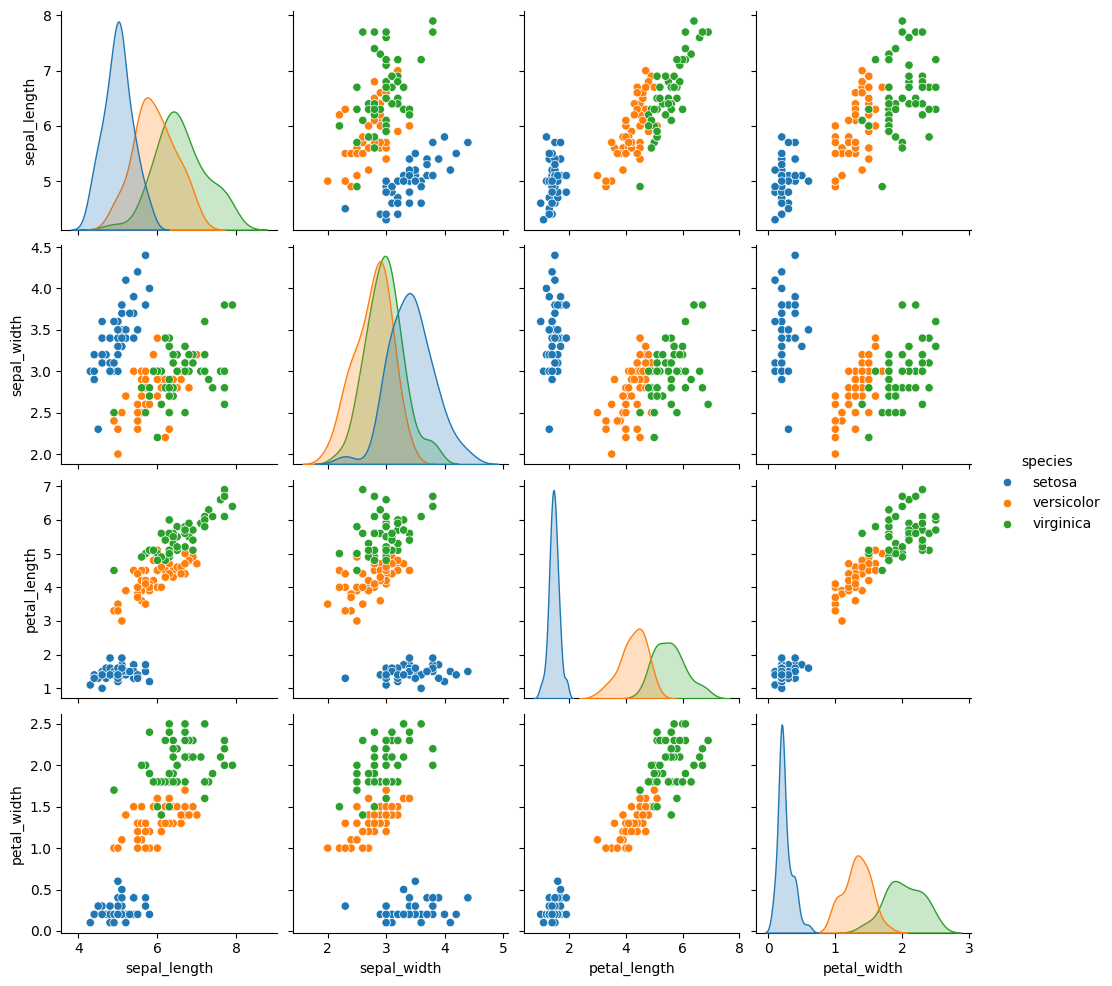

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load dataset
iris = sns.load_dataset('iris')

# Basic analysis
print("Dataset Info:")
print(iris.info())
print("\nDescriptive Statistics:")
print(iris.describe())
print("\nMissing Values:")
print(iris.isnull().sum())
print("\nCorrelation Matrix:")
print(iris.corr(numeric_only=True))

# Prepare data: Encode species
le = LabelEncoder()
iris['species_encoded'] = le.fit_transform(iris['species'])

# Create pairplot
sns.pairplot(iris, vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
             hue='species', diag_kind='kde')
plt.show()


## Step 4: Data Preparation
### Task:
Prepare the data for regression analysis by handling missing values, encoding categorical variables, and splitting the data into training and testing sets.

### Mini-task:
Drop rows with missing values and encode categorical variables if necessary.

#### Hint:
Use `data.dropna()` to remove rows with missing values and `pd.get_dummies()` to encode categorical variables.

```python
# Drop rows with missing values
### YOUR CODE HERE ###

# Encode categorical variables (if needed)
### YOUR CODE HERE ###
```

---

In [3]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load dataset
iris = sns.load_dataset('iris')

# Step 1: Handle missing values (Mini-task part 1)
# Drop rows with missing values (Iris has none, but included for generality)
iris_cleaned = iris.dropna()
print("Shape after dropping missing values:", iris_cleaned.shape)

# Step 2: Encode categorical variables (Mini-task part 2)
# Convert 'species' to dummy variables (one-hot encoding)
iris_encoded = pd.get_dummies(iris_cleaned, columns=['species'], prefix='species')
print("\nColumns after encoding:", iris_encoded.columns.tolist())

# Step 3: Define features (X) and target (y) for regression
# Example: Predict 'petal_width' from other features
X = iris_encoded.drop('petal_width', axis=1)  # Features
y = iris_encoded['petal_width']               # Target

# Step 4: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nTraining set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# Optional: Display first few rows of prepared data
print("\nFirst 5 rows of prepared feature data:")
print(X_train.head())

Shape after dropping missing values: (150, 5)

Columns after encoding: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species_setosa', 'species_versicolor', 'species_virginica']

Training set shape: (120, 6)
Testing set shape: (30, 6)

First 5 rows of prepared feature data:
    sepal_length  sepal_width  petal_length  species_setosa  \
22           4.6          3.6           1.0            True   
15           5.7          4.4           1.5            True   
65           6.7          3.1           4.4           False   
11           4.8          3.4           1.6            True   
42           4.4          3.2           1.3            True   

    species_versicolor  species_virginica  
22               False              False  
15               False              False  
65                True              False  
11               False              False  
42               False              False  


## Step 5: Model Building
### Task:
Fit a multiple linear regression model to predict sales using the selected independent variables.

### Mini-task:
Define the OLS formula and fit the model using the `statsmodels` library.

#### Hint:
Use `statsmodels.formula.api.ols()` to define the model and fit it to the data.

```python
import statsmodels.formula.api as smf

# Define the OLS formula
### YOUR CODE HERE ###

# Fit the model
### YOUR CODE HERE ###

# Display the model summary
### YOUR CODE HERE ###
```

---

In [4]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

# Load dataset
iris = sns.load_dataset('iris')

# Prepare data: No missing values in Iris, but dropna() included for generality
iris_cleaned = iris.dropna()

# Define the OLS formula (Mini-task)
# Predict petal_width (as "sales") using other variables
formula = 'petal_width ~ sepal_length + sepal_width + petal_length + C(species)'

# Fit the multiple linear regression model (Mini-task)
model = smf.ols(formula=formula, data=iris_cleaned).fit()

# Print model summary
print("Model Summary:")
print(model.summary())

# Optional: Split data and predict (for demonstration)
X = iris_cleaned[['sepal_length', 'sepal_width', 'petal_length', 'species']]
y = iris_cleaned['petal_width']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nTraining set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Model Summary:
                            OLS Regression Results                            
Dep. Variable:            petal_width   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     594.9
Date:                Thu, 03 Apr 2025   Prob (F-statistic):           3.03e-94
Time:                        11:51:55   Log-Likelihood:                 59.030
No. Observations:                 150   AIC:                            -106.1
Df Residuals:                     144   BIC:                            -88.00
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept

## Step 6: Model Evaluation
### Task:
Evaluate the model by checking the regression assumptions, including linearity, independence, normality, constant variance, and multicollinearity.

### Mini-task:
Create scatterplots to check the linearity assumption and calculate the residuals to check the normality assumption.

#### Hint:
Use `seaborn.scatterplot()` to create scatterplots and `statsmodels.qqplot()` to check the normality of residuals.

```python
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Create scatterplots for linearity
### YOUR CODE HERE ###

# Calculate residuals and create a Q-Q plot
### YOUR CODE HERE ###
```

---

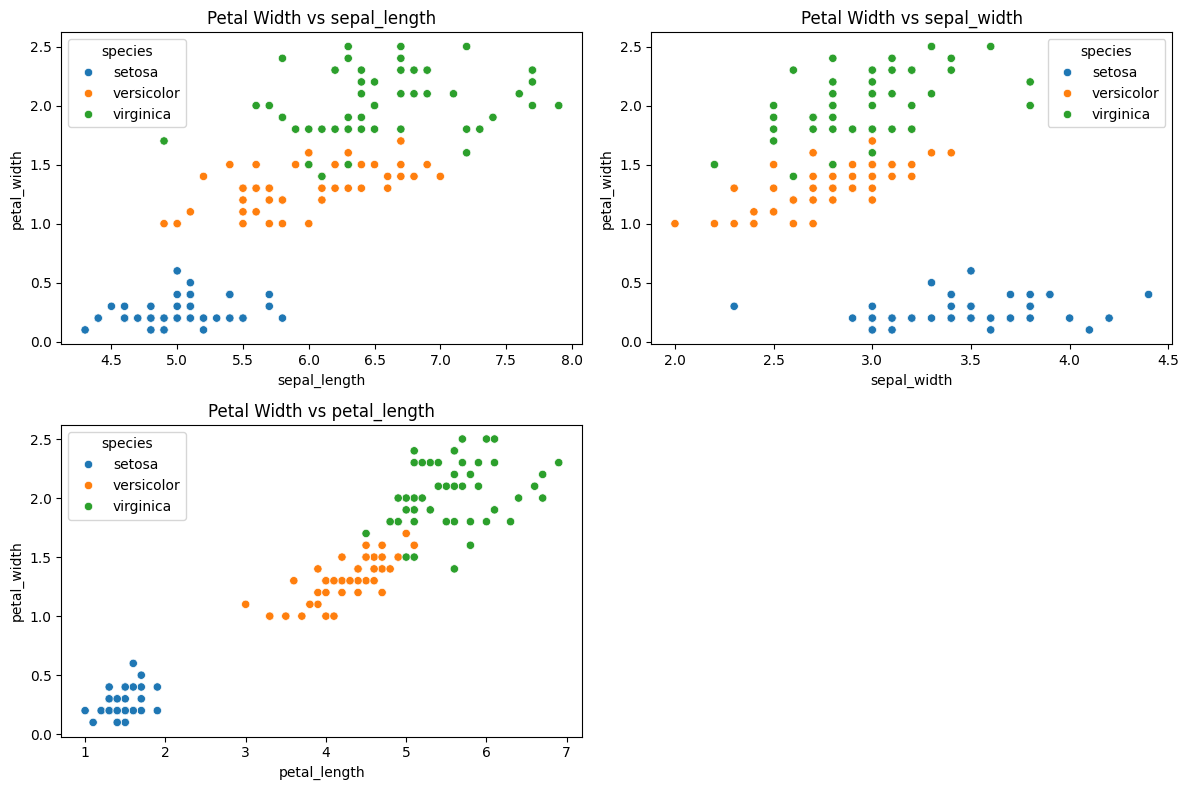

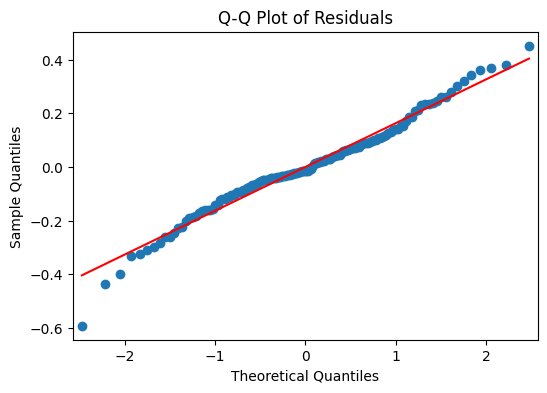

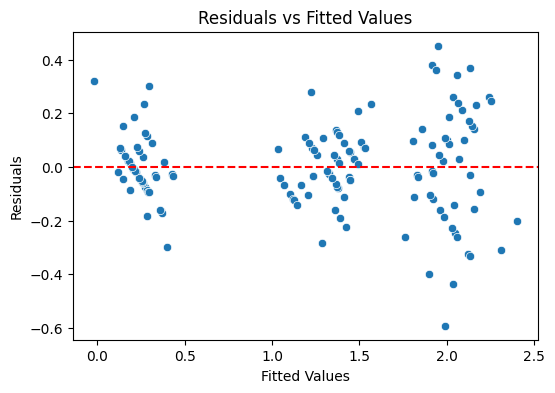


Breusch-Pagan Test for Homoscedasticity:
Test statistic: 27.815, p-value: 0.000

Durbin-Watson Statistic (Independence): 1.844

Variance Inflation Factors (VIF):
       Variable         VIF
0  sepal_length  205.120674
1   sepal_width   85.419726
2  petal_length   36.986432

Model Summary:
                            OLS Regression Results                            
Dep. Variable:            petal_width   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     594.9
Date:                Thu, 03 Apr 2025   Prob (F-statistic):           3.03e-94
Time:                        11:53:12   Log-Likelihood:                 59.030
No. Observations:                 150   AIC:                            -106.1
Df Residuals:                     144   BIC:                            -88.00
Df Model:                           5                                        

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load dataset
iris = sns.load_dataset('iris')

# Fit the multiple linear regression model
formula = 'petal_width ~ sepal_length + sepal_width + petal_length + C(species)'
model = smf.ols(formula=formula, data=iris).fit()

# Get predictions and residuals
predictions = model.predict(iris)
residuals = model.resid

# 1. Linearity (Mini-task: Scatterplots)
plt.figure(figsize=(12, 8))
for i, var in enumerate(['sepal_length', 'sepal_width', 'petal_length'], 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=iris[var], y=iris['petal_width'], hue=iris['species'])
    plt.title(f'Petal Width vs {var}')
plt.tight_layout()
plt.show()

# 2. Normality of Residuals (Mini-task: Q-Q Plot)
plt.figure(figsize=(6, 4))
sm.qqplot(residuals, line='s', ax=plt.gca())
plt.title('Q-Q Plot of Residuals')
plt.show()

# 3. Constant Variance (Homoscedasticity)
plt.figure(figsize=(6, 4))
sns.scatterplot(x=predictions, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()
# Breusch-Pagan test for heteroscedasticity
bp_test = het_breuschpagan(residuals, model.model.exog)
print("\nBreusch-Pagan Test for Homoscedasticity:")
print(f"Test statistic: {bp_test[0]:.3f}, p-value: {bp_test[1]:.3f}")

# 4. Independence (Durbin-Watson)
dw_stat = sm.stats.durbin_watson(residuals)
print("\nDurbin-Watson Statistic (Independence):", round(dw_stat, 3))

# 5. Multicollinearity (VIF)
X = iris[['sepal_length', 'sepal_width', 'petal_length']]
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factors (VIF):")
print(vif_data)

# Model summary for reference
print("\nModel Summary:")
print(model.summary())


## Step 7: Results and Interpretation
### Task:
Interpret the model results, including the R-squared value, coefficients, and their statistical significance.

### Mini-task:
Display the model summary and interpret the coefficients.

#### Hint:
Use `model.summary()` to display the model results and interpret the coefficients.

```python
# Display the model summary
### YOUR CODE HERE ###

# Interpret the coefficients
### YOUR CODE HERE ###
```

---

In [6]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

# Load dataset
iris = sns.load_dataset('iris')

# Fit the multiple linear regression model
formula = 'petal_width ~ sepal_length + sepal_width + petal_length + C(species)'
model = smf.ols(formula=formula, data=iris).fit()

# Display model summary (Mini-task)
print("Model Summary:")
print(model.summary())

# Interpretation (manually added below for clarity)
print("\nInterpretation of Model Results:")
print("1. R-squared:", round(model.rsquared, 3))
print("   - Proportion of variance in petal_width explained by the model.")
print("2. Adjusted R-squared:", round(model.rsquared_adj, 3))
print("   - Adjusted for the number of predictors.")
print("\nCoefficients and Significance:")
for param, coef, pval in zip(model.params.index, model.params, model.pvalues):
    sig = "Significant" if pval < 0.05 else "Not Significant"
    print(f"- {param}: {coef:.3f} (p-value: {pval:.3f}, {sig})")

Model Summary:
                            OLS Regression Results                            
Dep. Variable:            petal_width   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     594.9
Date:                Thu, 03 Apr 2025   Prob (F-statistic):           3.03e-94
Time:                        11:53:56   Log-Likelihood:                 59.030
No. Observations:                 150   AIC:                            -106.1
Df Residuals:                     144   BIC:                            -88.00
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept

## Considerations
**What are some key takeaways you learned from this project?**
- Reflect on the importance of checking regression assumptions and interpreting model coefficients.
- Consider how the model's insights can be used to optimize marketing strategies.

**How would you share your findings with a team?**
- Prepare a presentation with visualizations and key metrics.
- Discuss the impact of different marketing strategies on sales.

**What would you share with and recommend to stakeholders?**
- Highlight the key factors that contribute most to sales.
- Recommend strategies to optimize marketing efforts based on the model's insights.